In [1]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
from skimage import data

# Introduction to basic notions


## Libraries
There exists different libraries in python to process images:
- opencv
- PIL
- skimage
- scipy (deprecated for i/o)

Everything is compatible with `numpy` which is the basic library for calculus in python.

OpenCV is historically the first and is usually faster (it's based on C) but PIL is more popular and is integrated in many other libraries : scipy, tf.keras.prepocessing, pytorch.transforms.

> While most libraries deal with images as numpy arrays, PIL uses its own `Image` format which therefore should be converted to `np.ndarray` before doing most operations.

> **Important:** while most libraries reads/saves images as RGB, opencv reads and saves as BGR !! See examples in "Understanding color channels" section.

In [2]:
from PIL import Image
from skimage.io import imread
import time

t = time.time()
imgcv2 = cv2.imread('images/tree.jpg')
print("Time opencv read:", time.time() - t)

t = time.time()
imgpil = np.asarray(Image.open('images/tree.jpg'))
print("Time PIL read:", time.time() - t)

t = time.time()
imgsk = imread('images/tree.jpg')
print("Time skimage read:", time.time() - t)

Time opencv read: 0.006139039993286133
Time PIL read: 0.014573097229003906
Time skimage read: 0.009255170822143555


## Dtype
An image **dtype** shows on how many bits the pixel values are encoded. It is critical to know the image dtype at all times because usually operations between images require them to have same dtype, or some operations cannot be done on specific dtypes. Usual dtypes:
- `np.uint8`
- `np.uint16` (rarely used)
- `np.float32`
- `np.float64`

> Example: color conversions in opencv do not work on float64 images, they must first be converted to float32 `img32 = img64.astype(np.float32)` or `img32 = np.float32(img64)`.

## Range
Historically, images were encoded on 8 bits = 2^8 = 256 which is why by default an image is on range 0-255 dtype uint8. But very often, to simplify calculus, we choose to convert them to range 0-1.
> NB: changing an image color space (for instance to HSV, YCrCb) can change the range of the color channels. Fortunately in <a href="https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html">opencv they normalize the channels</a> to stay in 0-255.

In [4]:
simple = cv2.imread('images/simple.jpeg')
print(f"Image type: {simple.dtype}, image min: {np.amin(simple)}, image max: {np.amax(simple)}")

new = simple / 255.
print(f"Image type: {new.dtype}, image min: {np.amin(new)}, image max: {np.amax(new)}")

Image type: uint8, image min: 0, image max: 255
Image type: float64, image min: 0.0, image max: 1.0


# Understand color channels

## Simple image

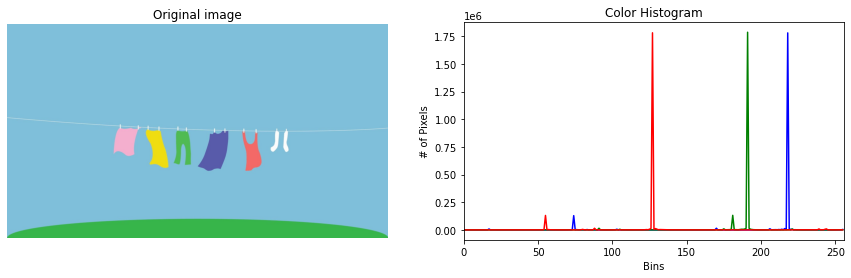

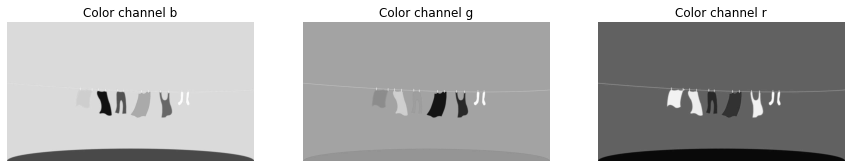

In [7]:
img = simple.copy()
plt.figure(figsize=(15, 4))
plt.subplot(121)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # here convert to RGB because it's opencv !!
plt.title('Original image')
plt.axis('off')

# loop over the image channels
plt.subplot(122)
plt.title("Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
features = []
chans = cv2.split(img)
colors = ("b", "g", "r")
for (chan, color) in zip(chans, colors):
    # create a histogram for the current channel and
    # concatenate the resulting histograms for each
    # channel
    hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
    features.extend(hist)

    # plot the histogram
    plt.plot(hist, color = color)
    plt.xlim([0, 256])
plt.show()

plt.figure(figsize=(15, 5))
for (image,i) in zip(chans,range(3)):
    plt.subplot(1,3,i+1)
    plt.imshow(image, cmap='gray')
    plt.title('Color channel %s'%colors[i])
    plt.axis('off')
plt.show()


The results are logical : a light pixel shows a strong value in a channel, a dark pixel shows absence.
* The white pixels in the original image also appear white in each channel (since white is [255, 255, 255] in RGB)
* The sky is clear on the blue channel while it's dark in the other channels, which explains why it appears blue in the RGB image. Same idea for the red shirt in R channel.

## Complex image

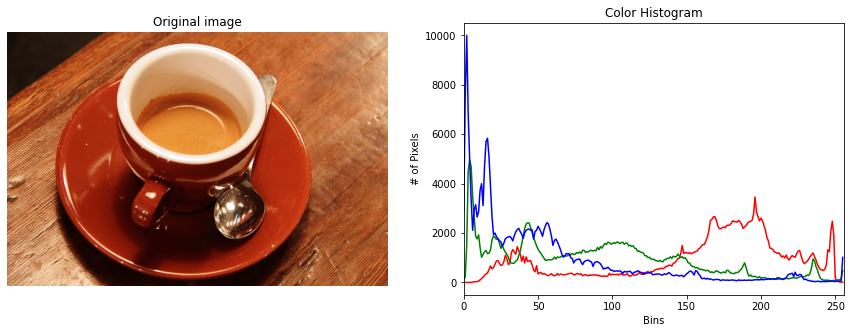

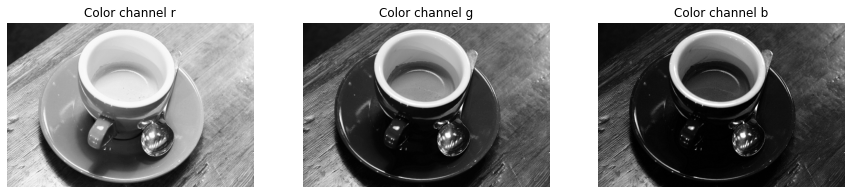

In [8]:
img = data.coffee()

plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.imshow(img)
plt.title('Original image')
plt.axis('off')

plt.subplot(122)
plt.title("Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
features = []
chans = cv2.split(img)
colors = ("r", "g", "b")
# draw histogram
for (chan, color) in zip(chans, colors):
    # create a histogram for the current channel
    hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
    features.extend(hist)

    # plot the histogram
    plt.plot(hist, color = color)
    plt.xlim([0, 256])
plt.show()

plt.figure(figsize=(15, 5))
for (image,i) in zip(chans,range(3)):
    plt.subplot(1,3,i+1)
    plt.imshow(image, cmap='gray')
    plt.title('Color channel %s'%colors[i])
    plt.axis('off')
plt.show()

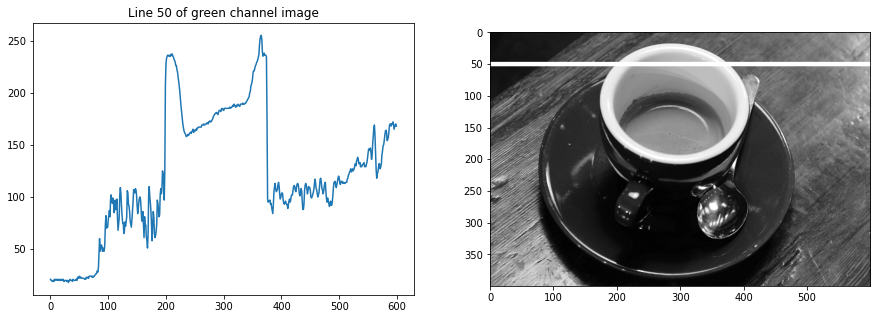

In [9]:
plt.figure(figsize=(15, 5))
img_channel = chans[1]
plt.subplot(121)
plt.title('Line 50 of green channel image')
plt.plot(np.array(img_channel[50,:]))

img_line = cv2.line(img_channel,(0,50),(img_channel.shape[1],50),255,5)
plt.subplot(122)
plt.imshow(img_line, cmap="gray")
plt.show()


Let's analyse the graph of green color channel.
- at the beginning, we have very low values: it's the dark zone at the top left of the table.
- on left and right of the peak, we have values around 100 : these represent the pixels of the table. Their high variation show the variation of wood colors.
- the top 2 peaks are for the bright white of the coffee border
- the middle of the 2 peaks are for the shadow inside the cup.

# Merging images

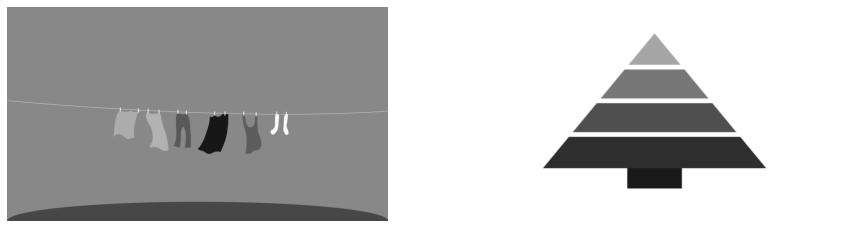

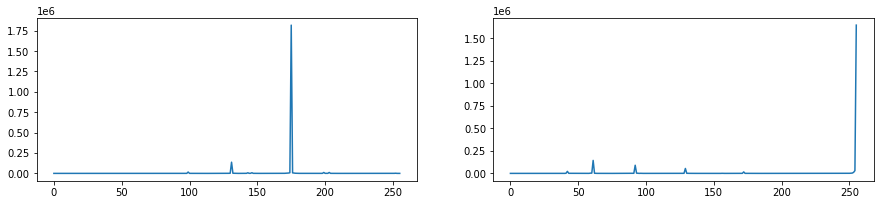

In [10]:
img1 = cv2.cvtColor(simple, cv2.COLOR_BGR2GRAY)
img2 = cv2.imread("images/tree.jpg", cv2.IMREAD_GRAYSCALE)

# images need to be of the same size
img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.imshow(img1, cmap='gray')
plt.axis('off')

plt.subplot(122)
plt.imshow(img2, cmap='gray')
plt.axis('off')
plt.show()

# histograms each image
plt.figure(figsize=(15, 3))
plt.subplot(121)
hist = cv2.calcHist([img1], [0], None, [256], [0, 256])
plt.plot(hist)
plt.subplot(122)
hist = cv2.calcHist([img2], [0], None, [256], [0, 256])
plt.plot(hist)
plt.show()

## Adding

min added image : 0, max new image : 255


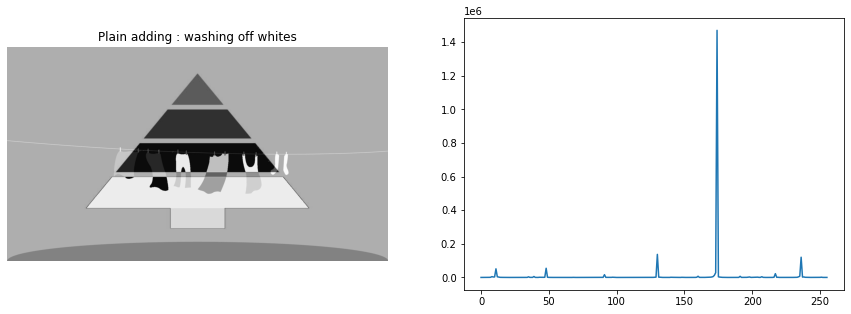

min added image : 78, max new image : 255


<Figure size 432x288 with 0 Axes>

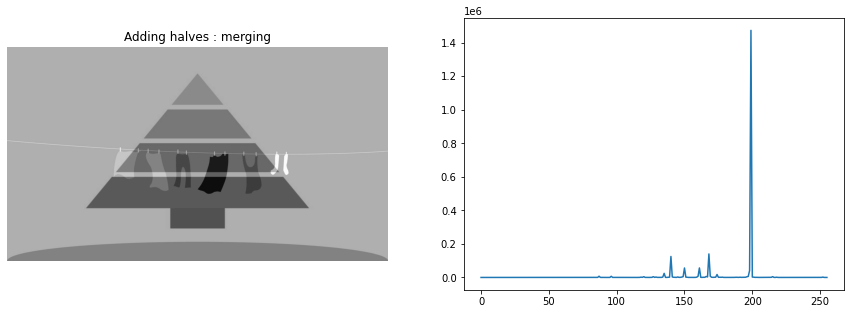

In [11]:
# Plain adding
img = img1 + img2
mini = np.amin(img)
maxi = np.amax(img)
print('min added image : %d, max new image : %d'%(mini,maxi))

plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Plain adding : washing off whites')

plt.subplot(122)
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.plot(hist)
plt.show()


# Weighted adding
plt.clf()
plt.figure(figsize=(15, 5))
img = (0.7*img1 + 0.3*img2).astype(np.uint16)
mini = np.amin(img)
maxi = np.amax(img)
print('min added image : %d, max new image : %d'%(mini,maxi))
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Adding halves : merging')

plt.subplot(122)
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.plot(hist)
plt.show()

## Substracting

Substraction clothes - tree
min added image : 0, max new image : 255
Normalized : min added image : 0, max new image : 255


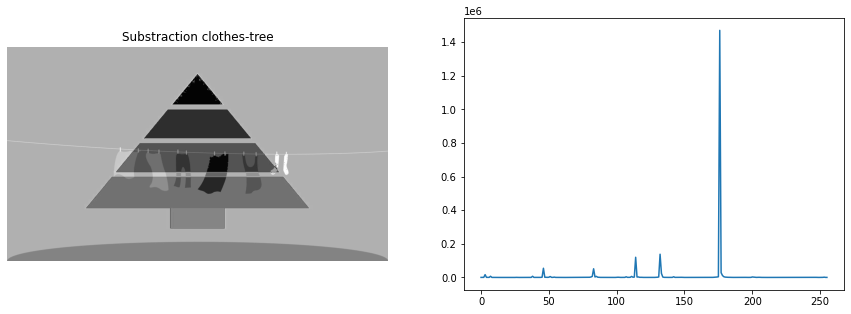

Substraction tree-clothes
min added image : 0, max new image : 255
Normalized : min added image : 0, max new image : 255


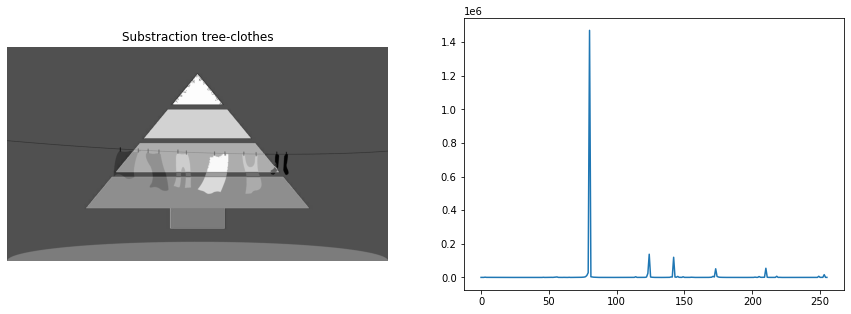

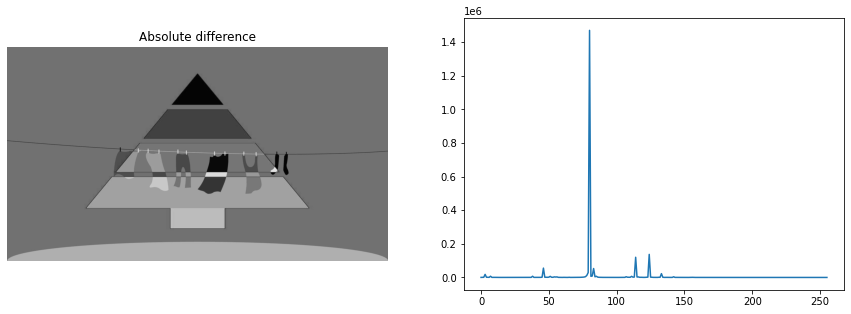

In [12]:
print('Substraction clothes - tree')
img = (img1 - img2)

mini = np.amin(img)
maxi = np.amax(img)
print('min added image : %d, max new image : %d'%(mini,maxi))

img = img.astype(np.uint8)
mini = np.amin(img)
maxi = np.amax(img)
print('Normalized : min added image : %d, max new image : %d'%(mini,maxi))

plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Substraction clothes-tree')

plt.subplot(122)
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.plot(hist)
plt.show()

print('Substraction tree-clothes')

img = (img2 - img1)
mini = np.amin(img)
maxi = np.amax(img)
print('min added image : %d, max new image : %d'%(mini,maxi))

img = img.astype(np.uint8)
mini = np.amin(img)
maxi = np.amax(img)
print('Normalized : min added image : %d, max new image : %d'%(mini,maxi))


plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Substraction tree-clothes')

plt.subplot(122)
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.plot(hist)
plt.show()

plt.figure(figsize=(15, 5))
plt.subplot(121)
img = cv2.absdiff(img1, img2)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Absolute difference')

plt.subplot(122)
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.plot(hist)
plt.show()
